<a href="https://colab.research.google.com/github/Erlangga24/MachineLearning/blob/main/UTS2_G_231_21_0018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Menganalisa dataset CarPrice_Assignment menggunakan metode Support Vector**

In [35]:
#import Pustaka yang diperlukan
import pandas as pd
import numpy as np
#menggunakan fungsi read_csv dari pustaka Pandas untuk membaca data dari file CSV 'CarPrice_Assignment.csv'.
data = pd.read_csv('CarPrice_Assignment.csv')

In [22]:
#untuk menampilkan beberapa baris pertama dari DataFrame
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
#mengubah variabel kategorikal dalam DataFrame data menjadi variabel dummy atau one-hot encoded
data=pd.get_dummies(data)

In [25]:
#menampilkan beberapa baris pertama dari DataFrame
data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [26]:
#menghapus baris yang nilai-nilai nya hilang (NaN) dari DataFrame
data=data.dropna()

In [27]:
#membuat variabel baru yang disebut y dan mengisinya dengan kolom 'enginetype_ohc' dari DataFrame
y=data['enginetype_ohc']

In [28]:
#mencetak bentuk (shape) dari DataFrame
print(data.shape)
#mencetak bentuk (shape) dari variabel y
print(y.shape)

(205, 201)
(205,)


In [29]:
#menghapus kolom 'enginetype_ohc'
data.drop(['enginetype_ohc'], axis=1)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [30]:
#membagi data menjadi set pelatihan dan set pengujian
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,y,shuffle=True)

In [16]:
#mencari accuracy dan memprediksi value nya dan true value lalu mencetak MAE serta RMSE
def accuracy(y_pred,y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    print("MAE",metrics.mean_absolute_error(y_test,y_pred))
    print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    plt.scatter(y_test,y_pred)
    plt.xlabel('predicted values')
    plt.ylabel('true values')
    plt.show()

In [34]:
#mengimport Support Vector dari pustaka Scikit-Learn
from sklearn import svm
#Baris ini membuat objek SVR dengan menggunakan kernel RBF.
clf = svm.SVR(kernel='rbf')
#melatih model Support Vector Regressor (SVR) pada data x_train dengan label y_train
clf.fit(x_train,y_train)
#membuat prediksi menggunakan model Support Vector Regressor (SVR) pada data pengujian (x_test)
y_pred_svr=clf.predict(x_test)

SVR Regression
MAE 0.34173934480412055
RMSE 0.4949095912292181


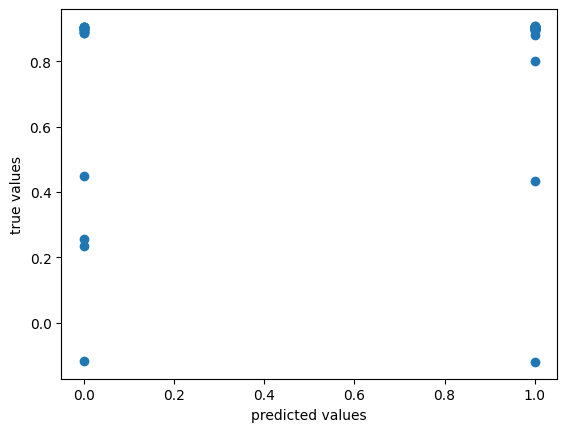

In [33]:
#mencetak judul "SVR Regression" dan kemudian memanggil fungsi accuracy untuk mengevaluasi kinerja model SVR Regressor
print("SVR Regression")
accuracy(y_pred_svr,y_test)